# Gráficos de Dispersión simples

Otro tipo de diagrama de uso común es el diagrama de dispersión simple, un primo cercano del grafico de líneas. A diferencia de este, en lugar de que los puntos estén unidos por segmentos de línea, aquí los puntos se representan individualmente con un marcador como un punto, círculo u otra forma.

Comenzaremos configurando el notebook para graficar e importar las funciones que usaremos:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

## Gráficos de dispersión con ``plt.plot``

En el notebook pasado, hemos visto la dualidad de interfaz que presenta Matplotlib para representar gráficos: ``plt.plot``/``ax.plot``.

Pues así como antes la hemos empleado para representar gráficas de línea, también la podremos usar ahora para representar gráficos de dispersión, lo único que deberemos hacer es establecer un marcador:

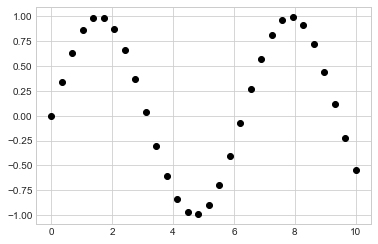

In [3]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

El tercer argumento en la llamada a la función es un carácter que representa el tipo de símbolo utilizado para el trazado. Así como antes específicabamos opciones como ``-`` o  ``-`` para controlar el estilo de línea, el estilo de marcador tiene su propio conjunto de códigos cortos. La lista completa de símbolos disponibles se puede ver en la documentación de `` plt.plot ``, o en la documentación en línea de Matplotlib.

La mayoría de las posibilidades son bastante intuitivas y mostraremos algunas de las más comunes aquí:

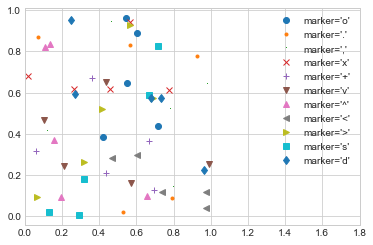

In [9]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

Para obtener aún más posibilidades, estos códigos de caracteres pueden combinarse con códigos de línea y color para trazar puntos junto con una línea que los conecte:

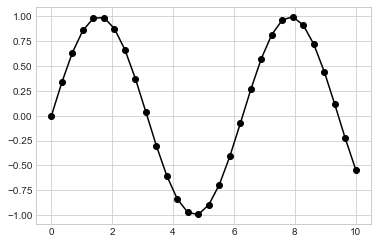

In [15]:
plt.plot(x, y, '-ok')

Los parámetros de `` plt.plot `` se pueden utilizar para especificar una amplia gama de propiedades de las líneas y marcadores:

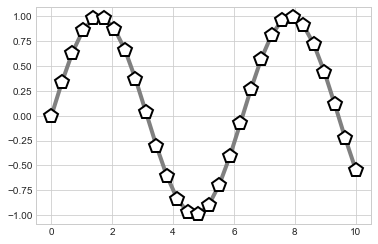

In [18]:
plt.plot(x, y, '-p',
        color='gray',
        linewidth=4,
        markerfacecolor='white',
        markersize=15,
        markeredgecolor='black',
        markeredgewidth=2);

Esta flexibilidad de la función `` plt.plot `` permite una amplia variedad de posibles opciones de visualización.
Para obtener una descripción más completa, te recomendaría que consultases la documentación de `` plt.plot ``.

## Gráficos de dispersión con ``plt.scatter``

Otra de las herramientas más potentes para crear diagramas de dispersión es la función `` plt.scatter ``, que se puede usar de manera muy similar a la función `` plt.plot ``:

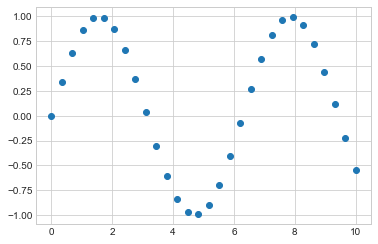

In [19]:
plt.scatter(x, y, marker='o');

**La principal diferencia entre `` plt.scatter `` y `` plt.plot `` es que el primero se puede usar para crear diagramas de dispersión donde las propiedades de cada punto individual (tamaño, color marcador, color de borde, etc.) se puede controlar individualmente o asignar a los datos. **

Demostremos esto creando un diagrama de dispersión aleatorio con puntos de muchos colores y tamaños.
Para ver mejor los resultados superpuestos, también usaremos la palabra clave ``alfa`` para ajustar el nivel de transparencia:

In [21]:
x

array([ 0.        ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])

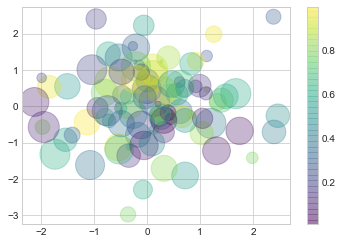

In [103]:
rng = np.random.RandomState(10)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

Fíjate que el argumento de color se asigna automáticamente a una escala de colores (mediante el comando `` colorbar () ``), y que el argumento de tamaño se especifica en píxeles.
De esta forma, el color y tamaño de los puntos se pueden utilizar para transmitir información en la visualización, con el fin de mostrar datos multidimensionales.

Por ejemplo, podríamos usar los datos de Iris de Scikit-Learn, donde cada muestra es uno de los tres tipos de flores a las que se les ha medido cuidadosamente el tamaño de sus pétalos y sépalos:

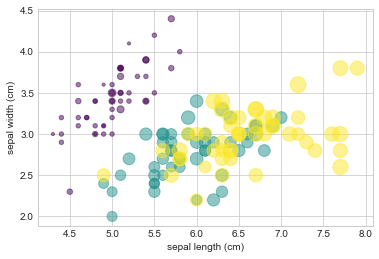

In [24]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.5,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

Podemos ver que este diagrama de dispersión nos da la capacidad de explorar simultáneamente cuatro dimensiones diferentes de los datos: la ubicación (x, y) de cada punto corresponde al largo y ancho del sépalo, el tamaño del punto está relacionado con el ancho del pétalo, y el color está relacionado con la especie particular de flor.
Los diagramas de dispersión multicolores y de múltiples características como este pueden ser útiles tanto para la exploración como para la presentación de datos.

## ``plot`` vs. ``scatter``: Una nota sobre eficiencia:

Bien, ya hemos definido las principales funciones disponibles en Matplotlib para la representación de gráficos de línea y dispersos: `` plt.plot `` y `` plt.scatter ``, pero... ¿por qué debería usar una sobre la otra?

Si bien es cierto que no importa tanto para pequeñas cantidades de datos, según los datasets comienzan a crecer en tamaño hasta llegar a miles y miles de puntos, `` plt.plot `` puede ser notablemente más eficiente que `` plt.scatter ``. La razón es que `` plt.scatter `` tiene la capacidad de representar un tamaño y / o color diferente para cada punto, por lo que el renderizador debe hacer el trabajo adicional de construir cada punto individualmente.

Por otro lado, en `` plt.plot `` los puntos son siempre esencialmente clones entre sí, por lo que el trabajo de determinar la apariencia de los puntos se realiza solo una vez para todo el conjunto de datos.
Para conjuntos de datos grandes, la diferencia entre estos dos puede llevar a un rendimiento muy diferente y, por esta razón, se debe preferir `` plt.plot `` sobre `` plt.scatter `` para conjuntos de datos grandes.

## Ejercicio 1

1. Créate un vector ``x`` de 40 puntos definido en [-5, 5]
2. Representa la función $y = 10^{sin(x+pi/2)} $ con una línea
3. Representa la misma función encima de la que estás ahora con el sigueinte marcador * y de color verde
4. Créate otra figura donde dibujes una línea con sus marcadores, pero en una sola representación, no hagas 2 como antes. Deberás usar un marcador 'o' y un color rojo


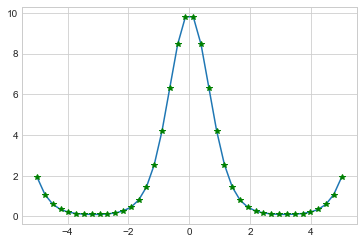

In [43]:
fig = plt.figure()

x = np.linspace(-5, 5, 40)

plt.plot(x, 10**(np.sin(x+np.pi/2)))
plt.plot(x, 10**(np.sin(x+np.pi/2)), '*g')

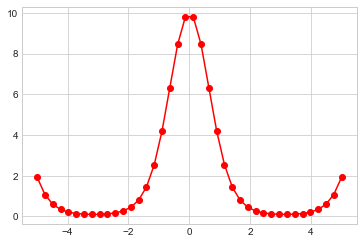

In [44]:
fig = plt.figure()

x = np.linspace(-5, 5, 40)

plt.plot(x, 10**(np.sin(x+np.pi/2)), '-or')

## Ejercicio 2

Hasta ahora hemos estado generando puntos de un vector y representando una función. Sin embargo, como hemos hecho en este notebook, también podemos representar puntos que no tienen por qué obedecer a un vector equiespaciado y su función, sino que pueden ser conjuntos de puntos independientes, como pueden ser 2 columnas d eun DataFrame.

En este caso, vamos a cargar los datos del fichero csv "data_to_plot.csv", donde tienes una columna ``x`` y otra ``y``, que deberás pasarle al plot. Representa estos puntos en un gráfico con un marcador ``.`` de color negro. Añádele todos los extras que quieras: leyenda, nombre de la gráfica...


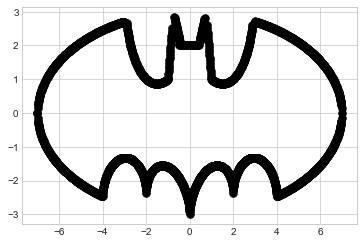

In [88]:
df = pd.read_csv("data_to_plot.csv")
plt.plot(df['x'], df['y'], 'k.', markersize=15)

## Ejercicio

Para realizar representaciones en este notebook, hemos utilizado un dataset de prueba de sklearn, el cual tenía diferentes medidas de flores. A continuación, utilizaremos uno de los dataset que ya hemos visto para analizarlo gráficamente:

1. Lee el fichero de coches ('coches.csv') que tienes en esta carpeta

2. Representa, en la misma figura, los caballos de potencia ("hp") frente al tiempo que tarda en hacer 1/4 de milla ("qsec") y frente a las millas por galón ("mpg").
  1. La variable "qsec" deberá ser representada con marcadores 'o' y una línea dashed de color rojo (marcador y linea)
  2. La variable "mpg" deberá ser representada con marcadores '^' verdes de tamaño 8 y una línea azul sólida

3. Representa con el método ``scatter`` la variable 'hp' frente a 'qsec' pero con el color en función de 'mpg', el tamaño en función de 'gear' (con un factor que puedes decidir tú para que se vean más grandes) y un mapeo de color 'viridis'. Muestra la barra de color a la derecha del gráfico, como hemos hecho antes. Añade los complementos visuales que quieras.

In [114]:
# 1. 
import pandas as pd
import numpy as np

df = pd.read_csv("coches.csv")
df

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


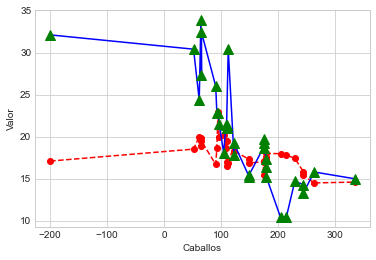

In [161]:
# 2. 

df = df.sort_values(by='hp')

plt.plot(df['hp'], df['qsec'], '--or', label='qsec')
plt.plot(df['hp'], df['mpg'], color = 'b', marker='^', markeredgecolor='g', markersize=10, markerfacecolor='g', linestyle='solid', label='mpg')
plt.xlabel('Caballos')
plt.ylabel('Valor');

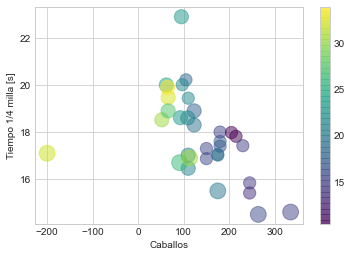

In [134]:
# 3. 

plt.scatter(df['hp'], df['qsec'], alpha=0.5,
            s=50*df['gear'], c=df['mpg'], cmap='viridis')
plt.xlabel('Caballos')
plt.ylabel('Tiempo 1/4 milla [s]')
plt.colorbar();